In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm 
import numpy as np
from nltk.tokenize import word_tokenize

In [2]:
# q1 = open('/home/xinming/Text2ESQ/input/easy_query.json')
# q2 = open('/home/xinming/Text2ESQ/input/medium_query.json')
# query1 = json.load(q1)
# query2 = json.load(q2)

f1 = open('/home/xinming/Text2ESQ/input/v2/easy_nl.json')
f2 = open('/home/xinming/Text2ESQ/input/medium_nl.json')
data1 = json.load(f1)
data2 = json.load(f2)

tp_easy_len = [len(word_tokenize(x.strip())) for x in data1['en']]
nl_easy_len = [len(word_tokenize(x.strip())) for x in data1['zh_en']]

tp_med_len = [len(word_tokenize(x.strip())) for x in data2['en']]
nl_med_len = [len(word_tokenize(x.strip())) for x in data2['zh_en']]

tp = tp_easy_len #+ tp_med_len
nl = nl_easy_len #+ nl_med_len

In [3]:
easy_query_df = pd.read_csv('/home/xinming/Text2ESQ/input/v2/easy.csv', index_col=0)
med_query_df = pd.read_csv('/home/xinming/Text2ESQ/input/v2/medium.csv', index_col=0)

In [4]:
easy_query = [len(word_tokenize(easy_query_df['query_post'][x])) + len(word_tokenize(easy_query_df['query_get'][x])) for x in range(len(easy_query_df))]
med_query = [len(word_tokenize(med_query_df['query_post'][x])) + len(word_tokenize(med_query_df['query_get'][x])) for x in range(len(med_query_df))]
query = easy_query #+ med_query

In [5]:
# Template Questions
print('easy tp:',
      '\nmax len: ', max(tp_easy_len),
      '\nmin len: ', min(tp_easy_len), 
      '\ntotal questions: ', len(tp_easy_len),
      '\naverage len: ', round(sum(tp_easy_len)/len(tp_easy_len), 2))

print('\nmedium tp:',
      '\nmax len: ', max(tp_med_len),
      '\nmin len: ', min(tp_med_len), 
      '\ntotal questions: ', len(tp_med_len),
      '\naverage len: ', round(sum(tp_med_len)/len(tp_med_len), 2))

print('\neasy nl:',
      '\nmax len: ', max(nl_easy_len),
      '\nmin len: ', min(nl_easy_len), 
      '\ntotal questions: ', len(nl_easy_len),
      '\naverage len: ', round(sum(nl_easy_len)/len(nl_easy_len), 2))

print('\nmedium nl:',
      '\nmax len: ', max(nl_med_len),
      '\nmin len: ', min(nl_med_len), 
      '\ntotal questions: ', len(nl_med_len),
      '\naverage len: ', round(sum(nl_med_len)/len(nl_med_len), 2))

easy tp: 
max len:  33 
min len:  5 
total questions:  13040 
average len:  12.13

medium tp: 
max len:  39 
min len:  8 
total questions:  9900 
average len:  17.45

easy nl: 
max len:  65 
min len:  1 
total questions:  13040 
average len:  11.52

medium nl: 
max len:  120 
min len:  1 
total questions:  9900 
average len:  15.4


In [6]:
print('\nQuery:',
      '\nmax len: ', max(query),
      '\nmin len: ', min(query), 
      '\ntotal queries: ', len(query),
      '\naverage len: ', round(sum(query)/len(query), 2))


Query: 
max len:  339 
min len:  114 
total queries:  22940 
average len:  167.65


# Plot

## tp

In [7]:
# Template Questions
print('All tp:',
      '\nmax len: ', max(tp),
      '\nmin len: ', min(tp), 
      '\ntotal questions: ', len(tp),
      '\naverage len: ', round(sum(tp)/len(tp), 2))

All tp: 
max len:  39 
min len:  5 
total questions:  22940 
average len:  14.43


<Figure size 1000x1000 with 0 Axes>

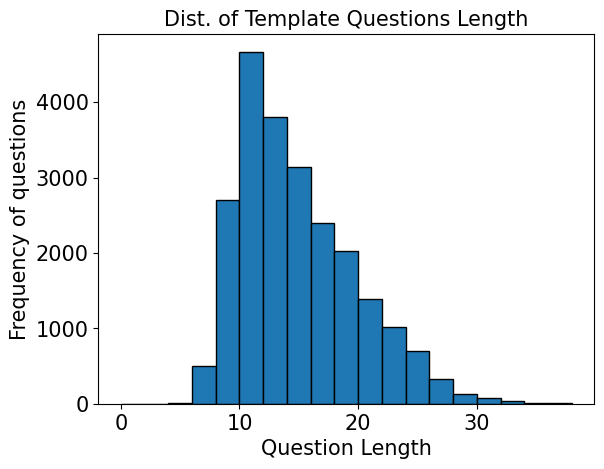

<Figure size 1000x1000 with 0 Axes>

In [23]:
plt.hist(tp, color='tab:blue', edgecolor='black', bins=np.arange(0, 40, 2))
plt.xlabel('Question Length', fontsize=15)
plt.ylabel('Frequency of questions', fontsize=15)
plt.title('Dist. of Template Questions Length', fontsize=15)
# plt.rc('')
# plt.rc('xtick', labelsize=15)
# plt.rc('ytick', labelsize=15)
plt.figure(figsize=[10,10])

# plt.savefig('/home/xinming/Text2ESQ/figures/template_questions.png')


## nl

In [10]:
# Natural Language Questions
print('max len: ', max(nl),
      '\nmin len: ', min(nl), 
      '\ntotal questions: ', len(nl),
      '\naverage len: ', round(sum(nl)/len(nl), 2))


max len:  120 
min len:  1 
total questions:  22940 
average len:  13.19


<Figure size 1000x1000 with 0 Axes>

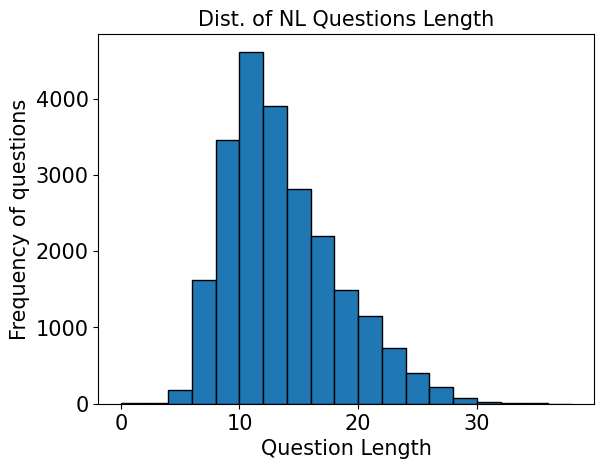

<Figure size 1000x1000 with 0 Axes>

In [22]:
plt.hist(nl, color='tab:blue', edgecolor='black', bins=np.arange(0, 40, 2))
plt.xlabel('Question Length', fontsize=15)
plt.ylabel('Frequency of questions', fontsize=15)
plt.title('Dist. of NL Questions Length', fontsize=15)
plt.figure(figsize=[10,10])

## query

In [24]:
# Query Questions
print('max len: ', max(query),
      '\nmin len: ', min(query), 
      '\ntotal queries: ', len(query),
      '\naverage len: ', round(sum(query)/len(query), 4))

max len:  339 
min len:  114 
total queries:  22940 
average len:  167.6453


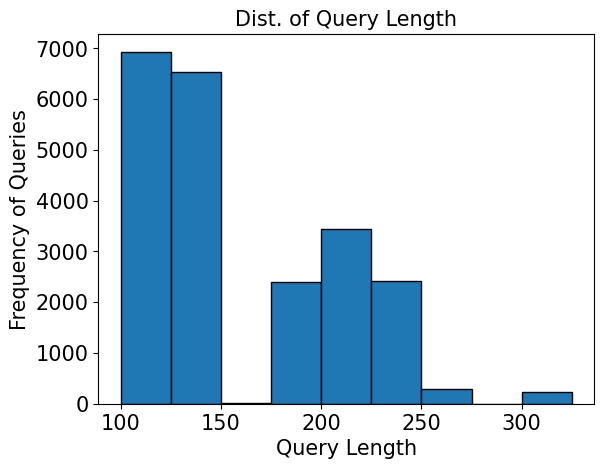

<Figure size 1000x1000 with 0 Axes>

In [32]:
plt.hist(query, color='tab:blue', edgecolor='black', bins=np.arange(100, 350, 25))
plt.xlabel('Query Length', fontsize=15)
plt.ylabel('Frequency of Queries', fontsize=15)
plt.title('Dist. of Query Length', fontsize=15)
plt.figure(figsize=[10,10])
plt.show()